In [1]:
import os
import random
import shutil
import zipfile

In [2]:
INSTRUMENT_CLASSES = [
    'accordion', 'banjo', 'drum', 'flute', 'guitar',
    'harmonica', 'saxophone', 'sitar', 'tabla', 'violin'
]

In [3]:
DATASET_ZIP_FILE = "musical_instruments_dataset.zip"

In [4]:
FOLDER_NAME_INSIDE_ZIP = 'music_instruments'

In [5]:
PROCESSED_DATASET_ROOT = '/content/instruments_processed_data'

In [6]:
TRAIN_RATIO = 0.8
TEST_RATIO = 0.2

In [7]:
print(f"Extracting {DATASET_ZIP_FILE}...")
try:
    with zipfile.ZipFile(DATASET_ZIP_FILE, 'r') as zip_ref:
        zip_ref.extractall('/content/')
    print(f"Successfully extracted {DATASET_ZIP_FILE} to /content/")
except FileNotFoundError:
    print(f"ERROR: {DATASET_ZIP_FILE} not found. Please upload it to Colab.")
    raise
except Exception as e:
    print(f"ERROR: Could not extract ZIP file: {e}")
    raise

Extracting musical_instruments_dataset.zip...
Successfully extracted musical_instruments_dataset.zip to /content/


In [8]:
SOURCE_DATA_BASE_PATH = os.path.join('/content', FOLDER_NAME_INSIDE_ZIP)

if not os.path.isdir(SOURCE_DATA_BASE_PATH):
    print(f"ERROR: The expected source data folder '{SOURCE_DATA_BASE_PATH}' was not found after unzipping.")
    print(f"Please check FOLDER_NAME_INSIDE_ZIP ('{FOLDER_NAME_INSIDE_ZIP}') and the contents of your ZIP file.")
    print(f"Files in /content/ are: {os.listdir('/content/')}")
    raise FileNotFoundError(f"Directory {SOURCE_DATA_BASE_PATH} not found.")
else:
    print(f"Source data base path set to: {SOURCE_DATA_BASE_PATH}")
    print(f"Contents of {SOURCE_DATA_BASE_PATH}: {os.listdir(SOURCE_DATA_BASE_PATH)}")

Source data base path set to: /content/music_instruments
Contents of /content/music_instruments: ['drum', 'saxophone', 'accordion', 'sitar', 'flute', 'banjo', 'tabla', 'guitar', 'dataset_stats.csv', 'harmonica', 'violin']


In [9]:
print(f"Creating train/test directories in {PROCESSED_DATASET_ROOT}...")
os.makedirs(PROCESSED_DATASET_ROOT, exist_ok=True)

for instrument_class in INSTRUMENT_CLASSES:
    os.makedirs(os.path.join(PROCESSED_DATASET_ROOT, 'train', instrument_class), exist_ok=True)
    os.makedirs(os.path.join(PROCESSED_DATASET_ROOT, 'test', instrument_class), exist_ok=True)

Creating train/test directories in /content/instruments_processed_data...


In [10]:
print("Splitting data into train and test sets...")
for instrument_class in INSTRUMENT_CLASSES:
    source_class_dir = os.path.join(SOURCE_DATA_BASE_PATH, instrument_class)
    train_class_dir = os.path.join(PROCESSED_DATASET_ROOT, 'train', instrument_class)
    test_class_dir = os.path.join(PROCESSED_DATASET_ROOT, 'test', instrument_class)

    if not os.path.isdir(source_class_dir):
        print(f"Warning: Source directory for class '{instrument_class}' not found at '{source_class_dir}'. Skipping this class.")
        continue

    files = [f for f in os.listdir(source_class_dir) if os.path.isfile(os.path.join(source_class_dir, f))
             and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    if not files:
        print(f"Warning: No image files found in '{source_class_dir}' for class '{instrument_class}'.")
        continue

    random.shuffle(files)
    train_split_index = int(len(files) * TRAIN_RATIO)
    train_files = files[:train_split_index]
    test_files = files[train_split_index:]

    print(f"Class {instrument_class}: {len(train_files)} train, {len(test_files)} test")

    for file in train_files:
        shutil.copy(os.path.join(source_class_dir, file), os.path.join(train_class_dir, file))
    for file in test_files:
        shutil.copy(os.path.join(source_class_dir, file), os.path.join(test_class_dir, file))

print(f"\nData splitting complete. Processed data is in: {PROCESSED_DATASET_ROOT}")
print("Verify structure:")
print(f"Train directory: {os.path.join(PROCESSED_DATASET_ROOT, 'train')}")
for instrument_class in INSTRUMENT_CLASSES:
    pth = os.path.join(PROCESSED_DATASET_ROOT, 'train', instrument_class)
    if os.path.exists(pth): print(f"  - {instrument_class}: {len(os.listdir(pth))} images")
print(f"Test directory: {os.path.join(PROCESSED_DATASET_ROOT, 'test')}")
for instrument_class in INSTRUMENT_CLASSES:
    pth = os.path.join(PROCESSED_DATASET_ROOT, 'test', instrument_class)
    if os.path.exists(pth): print(f"  - {instrument_class}: {len(os.listdir(pth))} images")

Splitting data into train and test sets...
Class accordion: 148 train, 38 test
Class banjo: 155 train, 39 test
Class drum: 152 train, 38 test
Class flute: 140 train, 35 test
Class guitar: 149 train, 38 test
Class harmonica: 134 train, 34 test
Class saxophone: 132 train, 33 test
Class sitar: 148 train, 37 test
Class tabla: 138 train, 35 test
Class violin: 146 train, 37 test

Data splitting complete. Processed data is in: /content/instruments_processed_data
Verify structure:
Train directory: /content/instruments_processed_data/train
  - accordion: 148 images
  - banjo: 155 images
  - drum: 152 images
  - flute: 140 images
  - guitar: 149 images
  - harmonica: 134 images
  - saxophone: 132 images
  - sitar: 148 images
  - tabla: 138 images
  - violin: 146 images
Test directory: /content/instruments_processed_data/test
  - accordion: 38 images
  - banjo: 39 images
  - drum: 38 images
  - flute: 35 images
  - guitar: 38 images
  - harmonica: 34 images
  - saxophone: 33 images
  - sitar: 37 

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random


In [12]:
IMG_SIZE_DEMO = (128, 128)
DATASET_TRAIN_DIR_DEMO = os.path.join(PROCESSED_DATASET_ROOT, 'train')


--- Running Preprocessing & Segmentation Demo on: /content/instruments_processed_data/train/flute/0182.jpg ---


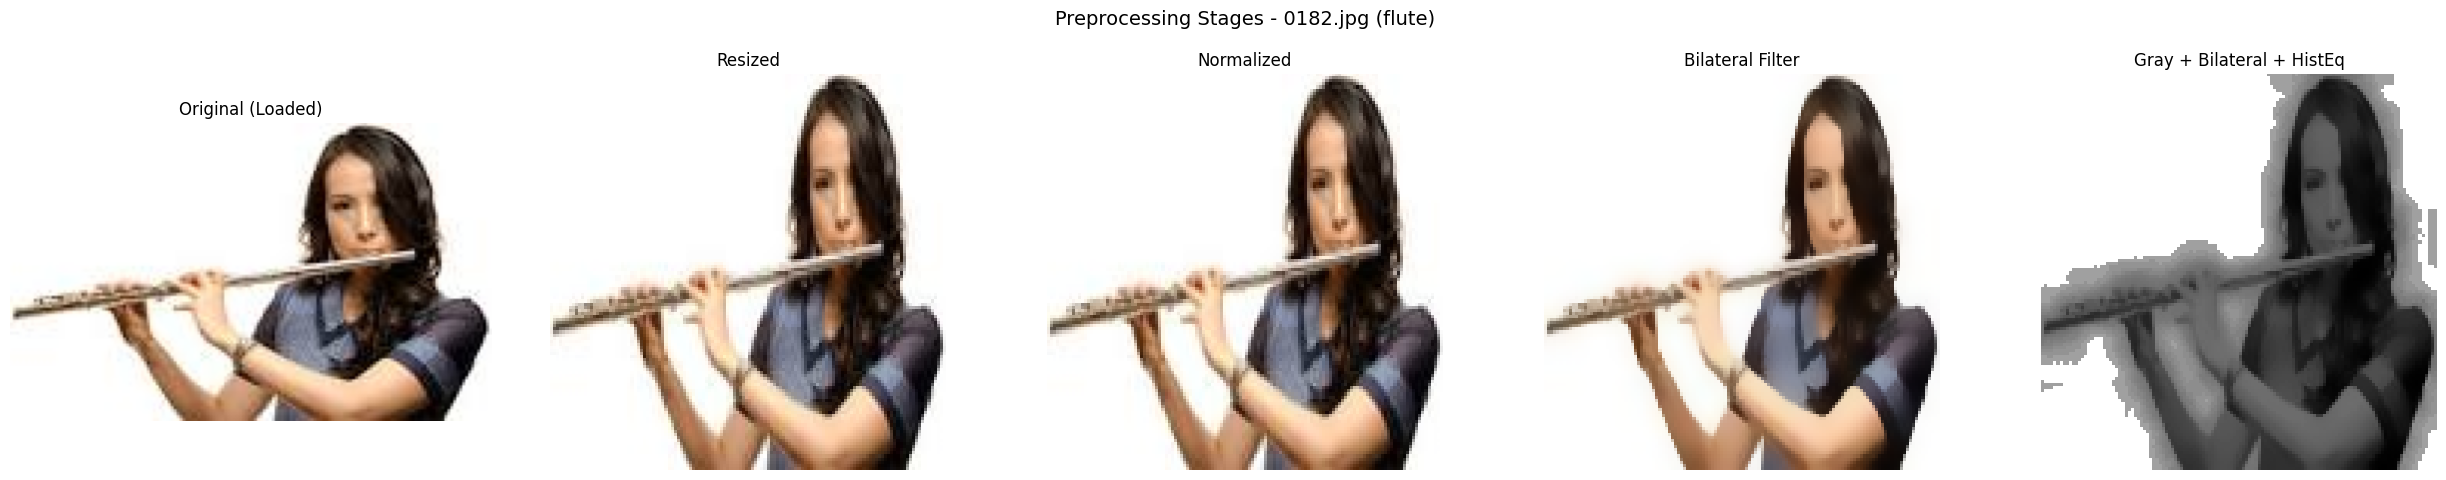

In [13]:
if not os.path.exists(DATASET_TRAIN_DIR_DEMO) or not any(os.scandir(DATASET_TRAIN_DIR_DEMO)):
    print(f"Train directory {DATASET_TRAIN_DIR_DEMO} is empty or does not exist. Skipping demo cell.")
else:
    available_classes_for_demo = [cls for cls in INSTRUMENT_CLASSES if os.path.exists(os.path.join(DATASET_TRAIN_DIR_DEMO, cls)) and len(os.listdir(os.path.join(DATASET_TRAIN_DIR_DEMO, cls))) > 0]

    if not available_classes_for_demo:
        print("No classes with images found in the training set. Skipping demo cell.")
    else:
        CATEGORY_DEMO = random.choice(available_classes_for_demo)
        TEMP_MASKS_DIR_DEMO = os.path.join(PROCESSED_DATASET_ROOT, 'temp_segmentation_masks_demo')
        os.makedirs(TEMP_MASKS_DIR_DEMO, exist_ok=True)

        category_path_demo = os.path.join(DATASET_TRAIN_DIR_DEMO, CATEGORY_DEMO)
        image_files_demo = [f for f in os.listdir(category_path_demo) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        if not image_files_demo:
            print(f"No images found in {category_path_demo} for demo. Skipping.")
        else:
            selected_image_demo = random.choice(image_files_demo)
            img_path_demo = os.path.join(category_path_demo, selected_image_demo)
            print(f"\n--- Running Preprocessing & Segmentation Demo on: {img_path_demo} ---")

            img_bgr_demo = cv2.imread(img_path_demo)
            if img_bgr_demo is None:
                print(f"Error: Could not read image {img_path_demo}")
            else:
                img_rgb_demo = cv2.cvtColor(img_bgr_demo, cv2.COLOR_BGR2RGB)
                img_resized_demo = cv2.resize(img_rgb_demo, IMG_SIZE_DEMO)
                img_gray_demo = cv2.cvtColor(img_resized_demo, cv2.COLOR_RGB2GRAY)
                img_norm_demo = img_resized_demo / 255.0
                img_bilateral_demo = cv2.bilateralFilter(img_resized_demo, 9, 75, 75)
                img_gray_after_bilateral_demo = cv2.cvtColor(img_bilateral_demo, cv2.COLOR_RGB2GRAY)
                img_eq_demo = cv2.equalizeHist(img_gray_after_bilateral_demo) # Using equalizeHist for simplicity

                fig_preproc, axs_preproc = plt.subplots(1, 5, figsize=(25, 5))
                axs_preproc[0].imshow(img_rgb_demo); axs_preproc[0].set_title('Original (Loaded)')
                axs_preproc[1].imshow(img_resized_demo); axs_preproc[1].set_title('Resized')
                axs_preproc[2].imshow(img_norm_demo); axs_preproc[2].set_title('Normalized')
                axs_preproc[3].imshow(img_bilateral_demo); axs_preproc[3].set_title('Bilateral Filter')
                axs_preproc[4].imshow(img_eq_demo, cmap='gray'); axs_preproc[4].set_title('Gray + Bilateral + HistEq')
                for ax in axs_preproc: ax.axis('off')
                plt.suptitle(f'Preprocessing Stages - {selected_image_demo} ({CATEGORY_DEMO})', fontsize=14)
                plt.tight_layout(rect=[0, 0.03, 1, 0.95])
                plt.show()

In [14]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import time


In [15]:
try:
    from ultralytics import YOLO
except ImportError:
    print("Installing ultralytics package for YOLOv8...")
    !pip install ultralytics -q
    from ultralytics import YOLO
print("Ultralytics YOLO imported successfully.")


Installing ultralytics package for YOLOv8...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.9 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with '

In [18]:
import shutil
YOLO_MASKS_OUTPUT_DIR = os.path.join(PROCESSED_DATASET_ROOT, 'yolo_generated_masks')

if os.path.exists(YOLO_MASKS_OUTPUT_DIR):
   print(f"Removing existing masks directory: {YOLO_MASKS_OUTPUT_DIR}")
   shutil.rmtree(YOLO_MASKS_OUTPUT_DIR)

os.makedirs(YOLO_MASKS_OUTPUT_DIR, exist_ok=True)

TRAIN_DIR_FOR_MASKS = os.path.join(PROCESSED_DATASET_ROOT, 'train')
TEST_DIR_FOR_MASKS = os.path.join(PROCESSED_DATASET_ROOT, 'test')

In [19]:
print("Loading YOLOv8 segmentation model (yolov8s-seg.pt)...")
try:
    yolo_seg_model = YOLO('yolov8s-seg.pt')
    print("YOLOv8 segmentation model loaded.")
except Exception as e:
    print(f"Error loading YOLO model: {e}")
    raise SystemExit("YOLO model loading failed. Cannot proceed with mask generation.")


Loading YOLOv8 segmentation model (yolov8s-seg.pt)...


100%|██████████| 22.8M/22.8M [00:00<00:00, 28.6MB/s]


YOLOv8 segmentation model loaded.


In [20]:
def generate_and_save_yolo_mask(image_path, base_dataset_root_for_relpath, masks_output_root_dir, model):
    """
    Generates a binary mask for an image using YOLOv8, combines all detected object masks,
    and saves it to a structured output directory.
    """
    try:
        rel_path = os.path.relpath(image_path, base_dataset_root_for_relpath)
        path_parts = os.path.normpath(rel_path).split(os.sep)

        if len(path_parts) != 3:
            print(f"Unexpected path structure for {image_path}. Rel path: {rel_path}. Skipping.")
            return None, f"path_error_unexpected_structure ({rel_path})"

        dataset_type, class_name, file_name_orig = path_parts

        class_mask_output_dir = os.path.join(masks_output_root_dir, dataset_type, class_name)
        os.makedirs(class_mask_output_dir, exist_ok=True)

        mask_file_name = os.path.splitext(file_name_orig)[0] + "_mask.png"
        mask_save_path = os.path.join(class_mask_output_dir, mask_file_name)

        if os.path.exists(mask_save_path):
            return mask_save_path, "already_exists"

        img_for_dims = cv2.imread(image_path)
        if img_for_dims is None:
            return None, "image_read_error"
        height, width = img_for_dims.shape[:2]

        yolo_results = model(image_path, conf=0.10, verbose=False)
        result_obj = yolo_results[0]

        if result_obj.masks is None or not result_obj.masks.data.numel():
            final_mask = np.zeros((height, width), dtype=np.uint8)
            status = "no_masks_found_by_yolo"
        else:
            combined_mask_for_image = np.zeros((height, width), dtype=bool)
            for mask_tensor in result_obj.masks.data:
                mask_np = mask_tensor.cpu().numpy().astype(bool)
                if mask_np.shape != (height, width):
                    mask_np = cv2.resize(mask_np.astype(np.uint8), (width, height), interpolation=cv2.INTER_NEAREST).astype(bool)
                combined_mask_for_image = np.logical_or(combined_mask_for_image, mask_np)

            final_mask = (combined_mask_for_image.astype(np.uint8) * 255)
            status = "masks_combined_from_yolo"

        cv2.imwrite(mask_save_path, final_mask)
        return mask_save_path, status

    except Exception as e:
        import traceback
        print(f"ERROR processing {image_path} for YOLO mask: {e}\n{traceback.format_exc()}")
        return None, f"error_during_yolo_processing ({e})"


In [21]:
all_image_paths_for_masks = []
for dataset_split_dir in [TRAIN_DIR_FOR_MASKS, TEST_DIR_FOR_MASKS]:
    if not os.path.exists(dataset_split_dir): continue
    for instrument_class in INSTRUMENT_CLASSES:
        class_dir_path = os.path.join(dataset_split_dir, instrument_class)
        if os.path.isdir(class_dir_path):
            for fname in os.listdir(class_dir_path):
                if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
                    all_image_paths_for_masks.append(os.path.join(class_dir_path, fname))

print(f"\nFound {len(all_image_paths_for_masks)} total images for YOLO mask generation.")




Found 1806 total images for YOLO mask generation.


In [22]:
# --- Generate Masks for All Images ---
print("Starting YOLO mask generation for all images...")
mask_generation_log = {}
start_time_yolo_batch = time.time()

for img_path in tqdm(all_image_paths_for_masks, desc="YOLO Mask Generation"):
    saved_mask_path, status_msg = generate_and_save_yolo_mask(img_path, PROCESSED_DATASET_ROOT, YOLO_MASKS_OUTPUT_DIR, yolo_seg_model)
    mask_generation_log[img_path] = status_msg

end_time_yolo_batch = time.time()
print(f"YOLO mask generation finished in {end_time_yolo_batch - start_time_yolo_batch:.2f} seconds.")

Starting YOLO mask generation for all images...


YOLO Mask Generation:   0%|          | 0/1806 [00:00<?, ?it/s]

YOLO mask generation finished in 1273.06 seconds.


In [23]:
status_summary = {}
for status_val in mask_generation_log.values():
    status_summary[status_val] = status_summary.get(status_val, 0) + 1

print("\n--- YOLO Mask Generation Summary ---")
for status_key, count in status_summary.items():
    print(f"  {status_key}: {count}")
print(f"Masks saved to: {os.path.abspath(YOLO_MASKS_OUTPUT_DIR)}")



--- YOLO Mask Generation Summary ---
  masks_combined_from_yolo: 1580
  no_masks_found_by_yolo: 226
Masks saved to: /content/instruments_processed_data/yolo_generated_masks



Displaying 10 examples of generated masks...


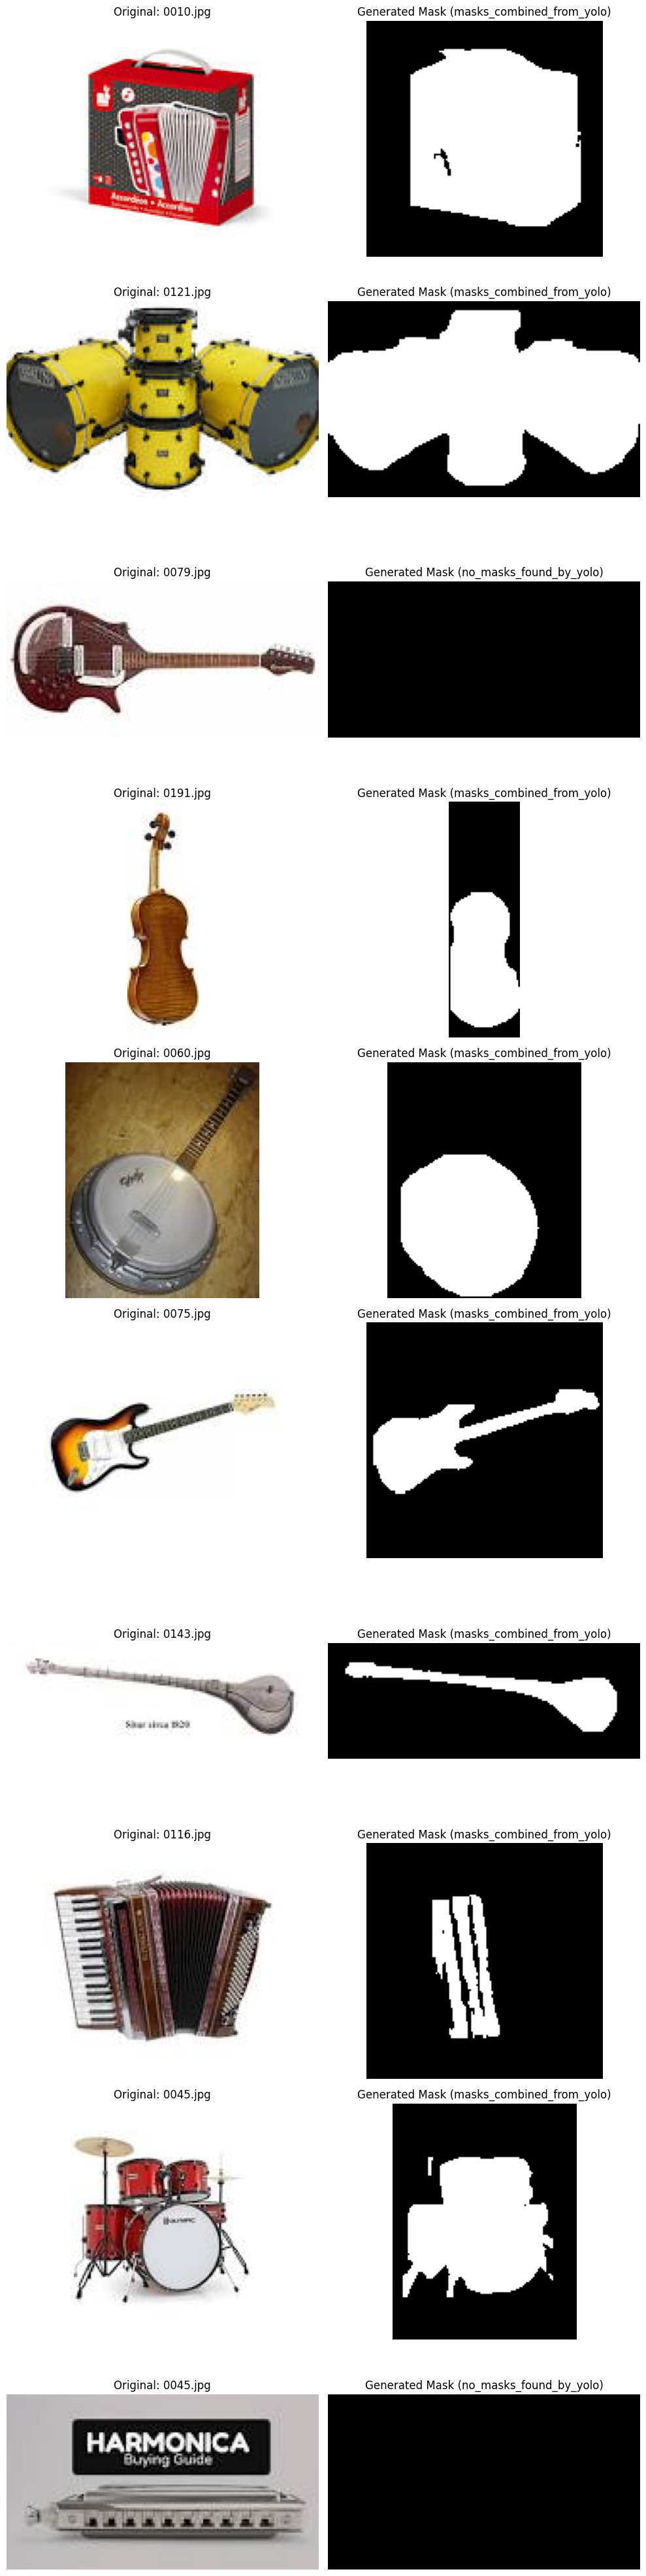

In [24]:
num_examples_to_show = min(10, len(all_image_paths_for_masks))
if num_examples_to_show > 0 and all_image_paths_for_masks:
    print(f"\nDisplaying {num_examples_to_show} examples of generated masks...")

    fig_masks, axes_masks = plt.subplots(num_examples_to_show, 2, figsize=(10, 4 * num_examples_to_show))
    if num_examples_to_show == 1:
        axes_masks = np.array([axes_masks])

    example_indices = random.sample(range(len(all_image_paths_for_masks)), num_examples_to_show)

    for i, img_idx in enumerate(example_indices):
        original_img_path = all_image_paths_for_masks[img_idx]

        rel_path_disp = os.path.relpath(original_img_path, PROCESSED_DATASET_ROOT)
        parts_disp = os.path.normpath(rel_path_disp).split(os.sep)
        mask_fname_disp = os.path.splitext(parts_disp[2])[0] + "_mask.png"
        generated_mask_path = os.path.join(YOLO_MASKS_OUTPUT_DIR, parts_disp[0], parts_disp[1], mask_fname_disp)

        img_orig_disp = cv2.imread(original_img_path)
        img_rgb_disp = cv2.cvtColor(img_orig_disp, cv2.COLOR_BGR2RGB)
        axes_masks[i, 0].imshow(img_rgb_disp)
        axes_masks[i, 0].set_title(f"Original: {os.path.basename(original_img_path)}")
        axes_masks[i, 0].axis('off')

        if os.path.exists(generated_mask_path):
            mask_disp = cv2.imread(generated_mask_path, cv2.IMREAD_GRAYSCALE)
            axes_masks[i, 1].imshow(mask_disp, cmap='gray')
            axes_masks[i, 1].set_title(f"Generated Mask ({mask_generation_log.get(original_img_path, 'N/A')})")
        else:
            axes_masks[i, 1].text(0.5, 0.5, 'Mask Not Found', ha='center', va='center')
            axes_masks[i, 1].set_title("Mask Not Found")
        axes_masks[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

In [25]:
import cv2
import numpy as np
from skimage.feature import graycomatrix, graycoprops
import os
from tqdm.notebook import tqdm
import pandas as pd

In [26]:
TRAIN_IMG_DIR_FE = os.path.join(PROCESSED_DATASET_ROOT, 'train')
TEST_IMG_DIR_FE = os.path.join(PROCESSED_DATASET_ROOT, 'test')
MASKS_INPUT_DIR_FE = YOLO_MASKS_OUTPUT_DIR

In [27]:
OUTPUT_TRAIN_FEATURES_CSV = os.path.join(PROCESSED_DATASET_ROOT, 'instrument_train_features.csv')
OUTPUT_TEST_FEATURES_CSV = os.path.join(PROCESSED_DATASET_ROOT, 'instrument_test_features.csv')

In [28]:
def extract_image_features(image_path, corresponding_mask_path, class_label_str):
    try:
        img_bgr = cv2.imread(image_path)
        mask_binary_input = cv2.imread(corresponding_mask_path, cv2.IMREAD_GRAYSCALE)

        if img_bgr is None:
            return None

        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

        if mask_binary_input is None:
            mask_binary_input = np.zeros_like(img_gray, dtype=np.uint8)

        _, mask_binary_processed = cv2.threshold(mask_binary_input, 127, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(mask_binary_processed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        default_feature_row = [
                os.path.basename(image_path), class_label_str,
                0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
            ]
        if not contours:
            return [default_feature_row]

        all_feature_vectors_for_image = []

        for contour in contours:
            area = cv2.contourArea(contour)
            if area < 50: continue

            perimeter = cv2.arcLength(contour, True)
            x_coord, y_coord, width_bbox, height_bbox = cv2.boundingRect(contour)

            aspect_ratio = float(width_bbox) / height_bbox if height_bbox > 0 else 0.0
            circularity = (4 * np.pi * area) / (perimeter**2) if perimeter > 1e-6 else 0.0

            single_contour_mask = np.zeros_like(img_gray)
            cv2.drawContours(single_contour_mask, [contour], -1, 255, cv2.FILLED)

            roi_gray = img_gray[y_coord : y_coord + height_bbox, x_coord : x_coord + width_bbox]
            roi_mask = single_contour_mask[y_coord : y_coord + height_bbox, x_coord : x_coord + width_bbox]

            mean_intensity, std_intensity, glcm_energy, glcm_homogeneity, shannon_entropy = 0.0, 0.0, 0.0, 0.0, 0.0

            if roi_gray.size > 0 and roi_mask.size > 0 and np.any(roi_mask):
                pixels_in_roi_mask = roi_gray[roi_mask == 255]
                if pixels_in_roi_mask.size > 0:
                    mean_intensity = np.mean(pixels_in_roi_mask)
                    std_intensity = np.std(pixels_in_roi_mask)

                if roi_gray.shape[0] >= 2 and roi_gray.shape[1] >= 2 and np.ptp(pixels_in_roi_mask) > 0:
                    try:
                        roi_gray_quantized = roi_gray.astype(np.uint8)
                        glcm = graycomatrix(roi_gray_quantized, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
                        glcm_energy = graycoprops(glcm, 'energy')[0, 0]
                        glcm_homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
                        shannon_entropy = -np.sum(glcm * np.log2(glcm + 1e-9))
                    except (ValueError, IndexError):
                        pass

            feature_vector = [
                os.path.basename(image_path), class_label_str,
                area, perimeter, aspect_ratio, circularity,
                mean_intensity, std_intensity,
                glcm_energy, glcm_homogeneity, shannon_entropy
            ]
            all_feature_vectors_for_image.append(feature_vector)

        if not all_feature_vectors_for_image:
             return [default_feature_row]

        return all_feature_vectors_for_image

    except Exception as e_main:
        return [[os.path.basename(image_path), class_label_str, 0,0,0,0,0,0,0,0,0]]

In [29]:
def get_mask_path_for_image(img_path_abs, base_img_root_abs, masks_root_abs):
    rel_img_path = os.path.relpath(img_path_abs, base_img_root_abs)
    img_path_parts = os.path.normpath(rel_img_path).split(os.sep)

    if len(img_path_parts) == 3:
        dataset_type, class_name, orig_fname = img_path_parts
        mask_fname = os.path.splitext(orig_fname)[0] + "_mask.png"
        return os.path.join(masks_root_abs, dataset_type, class_name, mask_fname)
    return None

In [30]:
feature_columns = [
    'filename', 'class_label',
    'area', 'perimeter', 'aspect_ratio', 'circularity',
    'mean_intensity', 'std_intensity',
    'glcm_energy', 'glcm_homogeneity', 'shannon_entropy'
]

In [31]:
for dataset_type_str in ['train', 'test']:
    print(f"\n--- Extracting features for {dataset_type_str} set ---")

    current_image_dir = os.path.join(PROCESSED_DATASET_ROOT, dataset_type_str)
    output_csv_file = OUTPUT_TRAIN_FEATURES_CSV if dataset_type_str == 'train' else OUTPUT_TEST_FEATURES_CSV

    master_feature_list_for_set = []
    image_paths_in_set = []

    for instr_class in INSTRUMENT_CLASSES:
        class_folder = os.path.join(current_image_dir, instr_class)
        if os.path.isdir(class_folder):
            for img_file in os.listdir(class_folder):
                if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    image_paths_in_set.append((os.path.join(class_folder, img_file), instr_class))

    if not image_paths_in_set:
        print(f"No images found for {dataset_type_str} set. Creating empty CSV.")
        empty_df = pd.DataFrame(columns=feature_columns)
        empty_df.to_csv(output_csv_file, index=False)
        continue

    for img_full_path, img_class_label in tqdm(image_paths_in_set, desc=f"Processing {dataset_type_str} images"):
        mask_file_path = get_mask_path_for_image(img_full_path, PROCESSED_DATASET_ROOT, MASKS_INPUT_DIR_FE)

        if mask_file_path is None :
            master_feature_list_for_set.append([os.path.basename(img_full_path), img_class_label] + [0.0]*9)
            continue

        features_from_one_image = extract_image_features(img_full_path, mask_file_path, img_class_label)

        if features_from_one_image:
            master_feature_list_for_set.extend(features_from_one_image)

    if master_feature_list_for_set:
        features_df = pd.DataFrame(master_feature_list_for_set, columns=feature_columns)
        features_df.replace([np.inf, -np.inf], np.nan, inplace=True)
        features_df.fillna(0.0, inplace=True)

        features_df.to_csv(output_csv_file, index=False)
        print(f"Features for {dataset_type_str} set ({len(features_df)} vectors) saved to {output_csv_file}")
    else:
        print(f"No features were extracted for {dataset_type_str} set. Creating empty CSV.")
        empty_df = pd.DataFrame(columns=feature_columns)
        empty_df.to_csv(output_csv_file, index=False)

print("\n--- Feature Extraction Process Completed ---")


--- Extracting features for train set ---


Processing train images:   0%|          | 0/1442 [00:00<?, ?it/s]

Features for train set (1874 vectors) saved to /content/instruments_processed_data/instrument_train_features.csv

--- Extracting features for test set ---


Processing test images:   0%|          | 0/364 [00:00<?, ?it/s]

Features for test set (475 vectors) saved to /content/instruments_processed_data/instrument_test_features.csv

--- Feature Extraction Process Completed ---


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
)
from itertools import cycle
import time

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [33]:
try:
    TRAIN_FEATURES_CSV_PATH = OUTPUT_TRAIN_FEATURES_CSV
    TEST_FEATURES_CSV_PATH = OUTPUT_TEST_FEATURES_CSV
except NameError:
    print("Warning: OUTPUT_TRAIN_FEATURES_CSV or OUTPUT_TEST_FEATURES_CSV not defined from previous cell.")
    print("Please ensure these variables point to your feature CSV files or define them manually below.")




--- Starting Machine Learning Classification (Revised) ---
Raw train features: (1874, 11), Raw test features: (475, 11)
Cleaned train features (after dropna on target & features): (1874, 11), Cleaned test features: (475, 11)
Final X_train_scaled: (1874, 9), y_train_encoded: (1874,)
Final X_test_scaled: (475, 9), y_test_encoded: (475,)

Data ready for ML. Number of classes in LabelEncoder: 10
Classes known by LabelEncoder: ['accordion' 'banjo' 'drum' 'flute' 'guitar' 'harmonica' 'saxophone' 'sitar' 'tabla' 'violin']

Final distribution of classes in y_train (input to models):
  Class 'accordion' (encoded 0): 187 samples
  Class 'banjo' (encoded 1): 191 samples
  Class 'drum' (encoded 2): 250 samples
  Class 'flute' (encoded 3): 176 samples
  Class 'guitar' (encoded 4): 188 samples
  Class 'harmonica' (encoded 5): 154 samples
  Class 'saxophone' (encoded 6): 158 samples
  Class 'sitar' (encoded 7): 183 samples
  Class 'tabla' (encoded 8): 187 samples
  Class 'violin' (encoded 9): 200 s

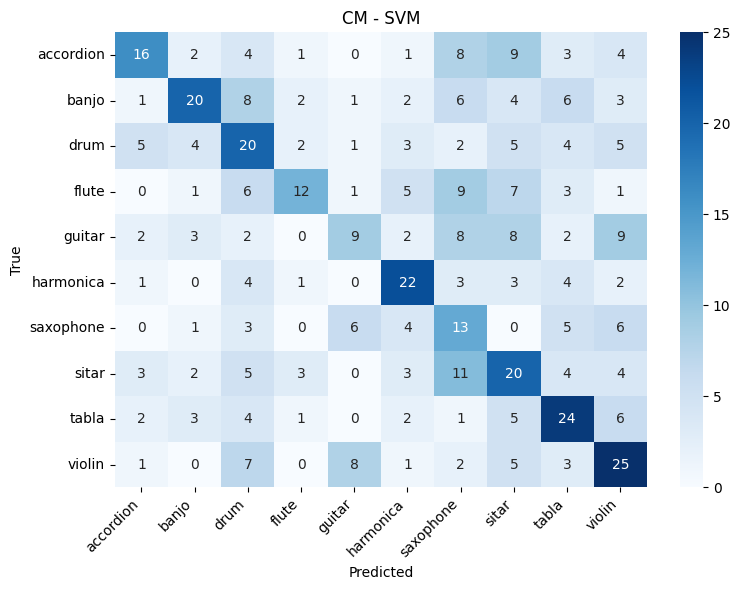

Error plotting learning curve for LC - SVM: The number of classes has to be greater than one; got 1 class


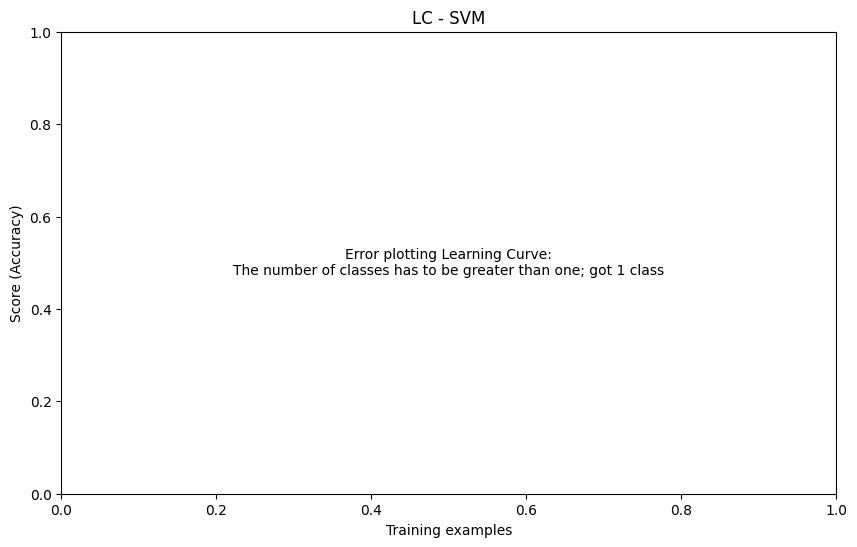

  ROC AUC (OvR, weighted): 0.7759

--- Evaluating: k-NN(k=5) ---
  Accuracy: 0.3474, Precision(w): 0.3536, Recall(w): 0.3474, F1-score(w): 0.3371

Classification Report:
              precision    recall  f1-score   support

   accordion       0.25      0.56      0.35        48
       banjo       0.35      0.40      0.37        53
        drum       0.27      0.37      0.31        51
       flute       0.38      0.24      0.30        45
      guitar       0.43      0.29      0.35        45
   harmonica       0.56      0.55      0.56        40
   saxophone       0.26      0.16      0.20        38
       sitar       0.17      0.07      0.10        55
       tabla       0.43      0.38      0.40        48
      violin       0.47      0.46      0.47        52

    accuracy                           0.35       475
   macro avg       0.36      0.35      0.34       475
weighted avg       0.35      0.35      0.34       475



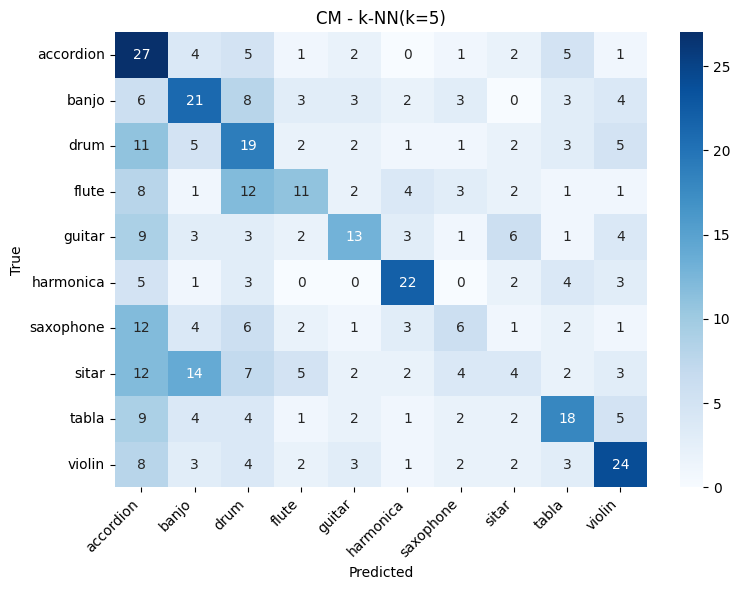

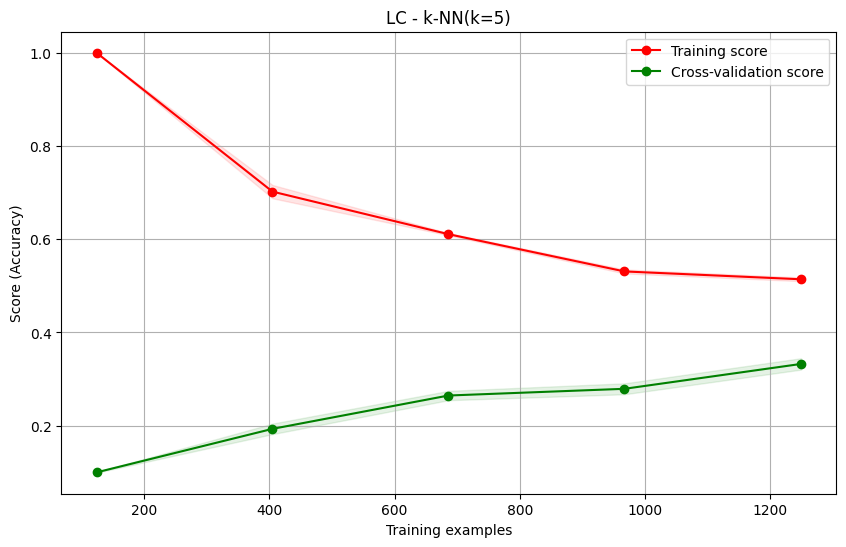

  ROC AUC (OvR, weighted): 0.6850

--- Evaluating: RF ---
  Accuracy: 0.3979, Precision(w): 0.4151, Recall(w): 0.3979, F1-score(w): 0.3973

Classification Report:
              precision    recall  f1-score   support

   accordion       0.46      0.40      0.43        48
       banjo       0.56      0.34      0.42        53
        drum       0.36      0.51      0.42        51
       flute       0.42      0.31      0.36        45
      guitar       0.42      0.42      0.42        45
   harmonica       0.50      0.55      0.52        40
   saxophone       0.21      0.37      0.27        38
       sitar       0.29      0.18      0.22        55
       tabla       0.41      0.48      0.44        48
      violin       0.49      0.46      0.48        52

    accuracy                           0.40       475
   macro avg       0.41      0.40      0.40       475
weighted avg       0.42      0.40      0.40       475



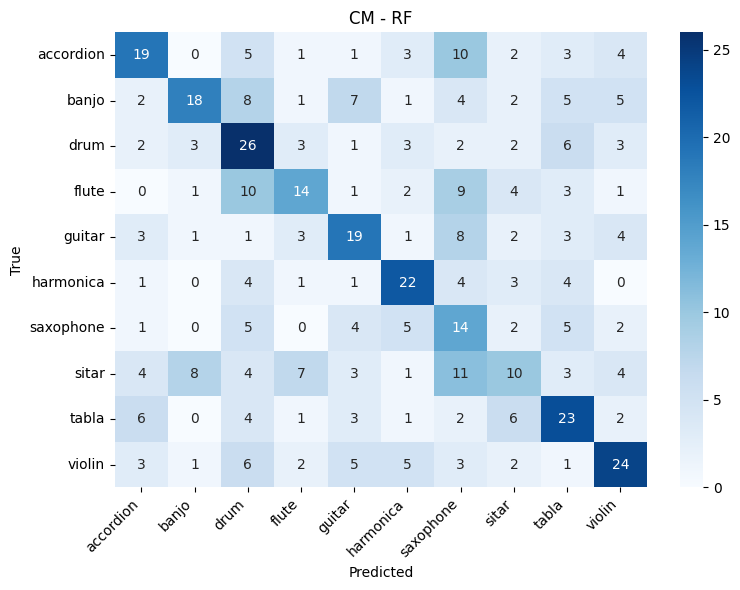

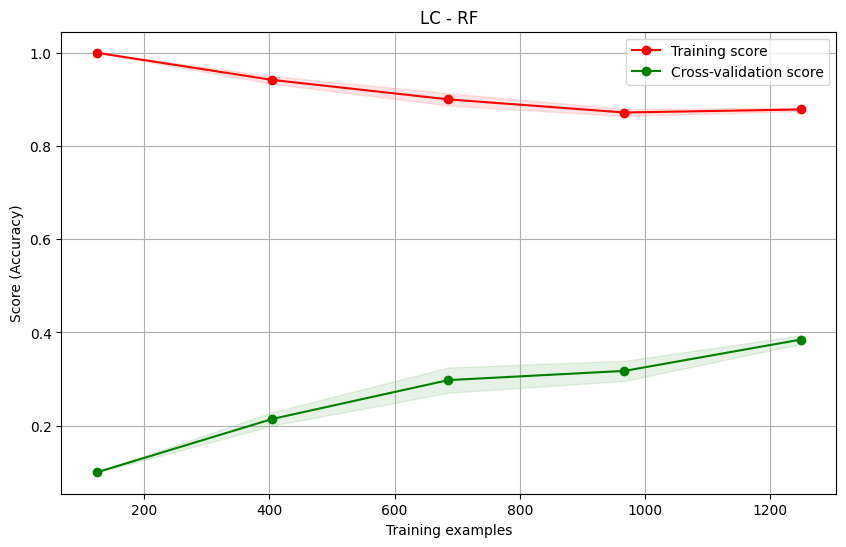

  ROC AUC (OvR, weighted): 0.7882


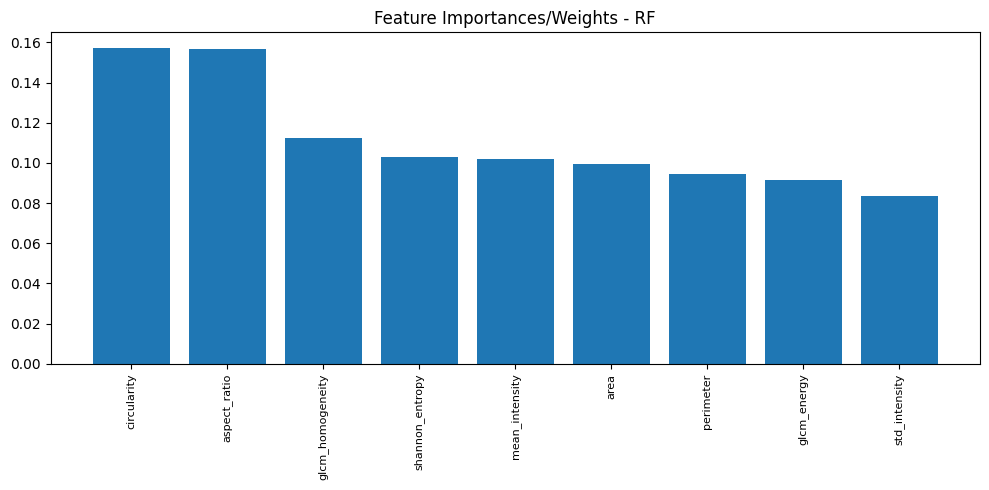


--- Evaluating: LogReg ---
  Accuracy: 0.2821, Precision(w): 0.2886, Recall(w): 0.2821, F1-score(w): 0.2772

Classification Report:
              precision    recall  f1-score   support

   accordion       0.41      0.38      0.39        48
       banjo       0.33      0.32      0.32        53
        drum       0.16      0.16      0.16        51
       flute       0.39      0.20      0.26        45
      guitar       0.25      0.13      0.17        45
   harmonica       0.31      0.55      0.39        40
   saxophone       0.14      0.18      0.16        38
       sitar       0.28      0.25      0.27        55
       tabla       0.33      0.35      0.34        48
      violin       0.27      0.31      0.29        52

    accuracy                           0.28       475
   macro avg       0.29      0.28      0.28       475
weighted avg       0.29      0.28      0.28       475



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


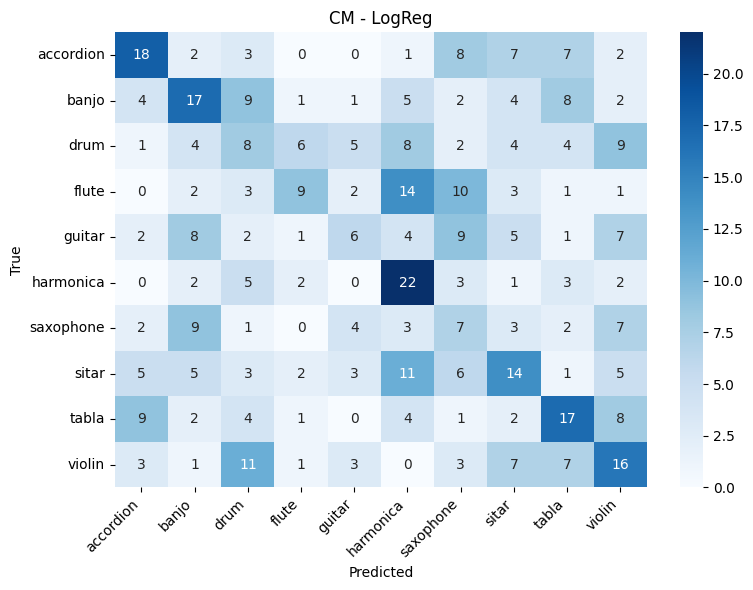

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Error plotting learning curve for LC - LogReg: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(0)


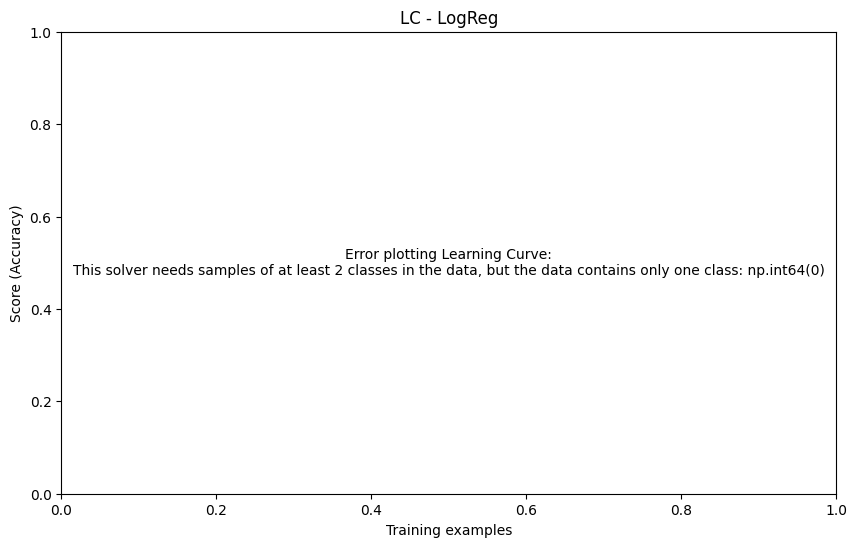

  ROC AUC (OvR, weighted): 0.7209


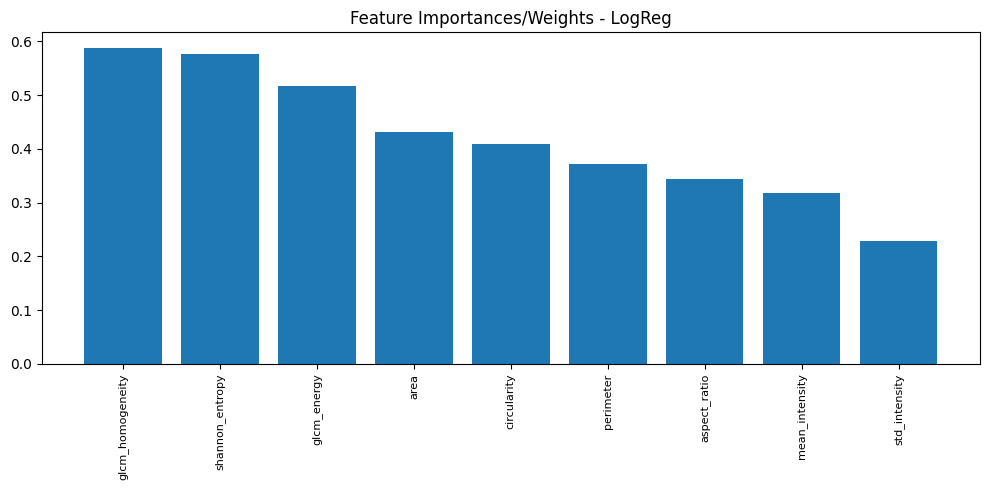


--- Evaluating: GNB ---
  Accuracy: 0.2674, Precision(w): 0.2872, Recall(w): 0.2674, F1-score(w): 0.2264

Classification Report:
              precision    recall  f1-score   support

   accordion       0.20      0.02      0.04        48
       banjo       0.27      0.23      0.25        53
        drum       0.23      0.47      0.31        51
       flute       0.54      0.31      0.39        45
      guitar       0.67      0.04      0.08        45
   harmonica       0.37      0.35      0.36        40
   saxophone       0.17      0.21      0.19        38
       sitar       0.00      0.00      0.00        55
       tabla       0.27      0.62      0.38        48
      violin       0.24      0.42      0.30        52

    accuracy                           0.27       475
   macro avg       0.30      0.27      0.23       475
weighted avg       0.29      0.27      0.23       475



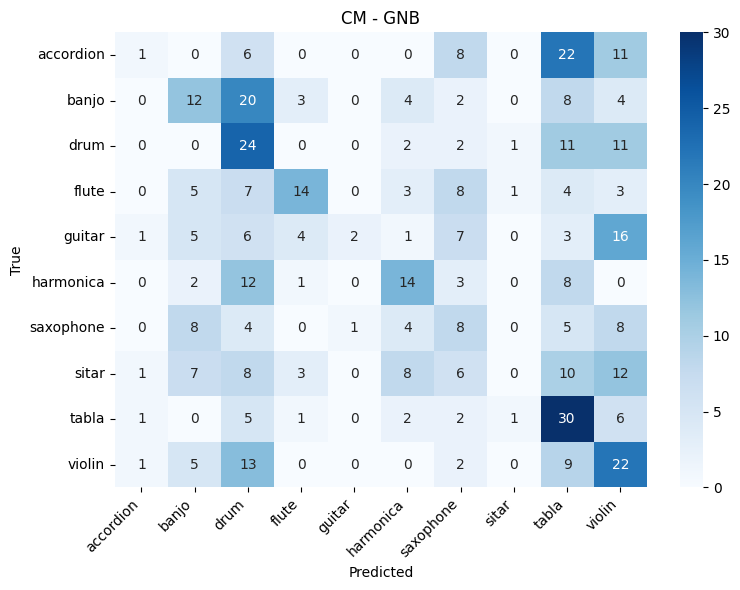

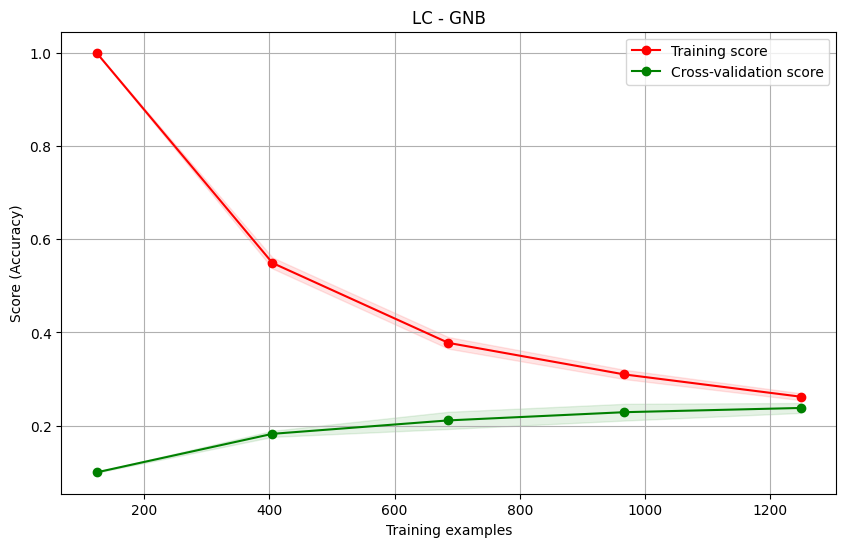

  ROC AUC (OvR, weighted): 0.7015

--- Evaluating: DT ---
  Accuracy: 0.3095, Precision(w): 0.3356, Recall(w): 0.3095, F1-score(w): 0.3116

Classification Report:
              precision    recall  f1-score   support

   accordion       0.35      0.40      0.37        48
       banjo       0.35      0.23      0.28        53
        drum       0.30      0.33      0.32        51
       flute       0.43      0.29      0.35        45
      guitar       0.35      0.16      0.22        45
   harmonica       0.62      0.53      0.57        40
   saxophone       0.21      0.39      0.27        38
       sitar       0.17      0.25      0.21        55
       tabla       0.31      0.23      0.26        48
      violin       0.32      0.35      0.33        52

    accuracy                           0.31       475
   macro avg       0.34      0.31      0.32       475
weighted avg       0.34      0.31      0.31       475



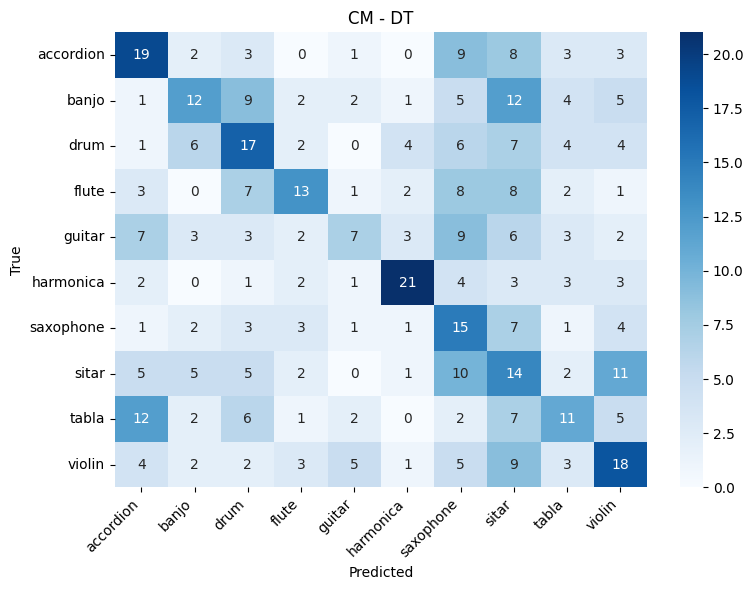

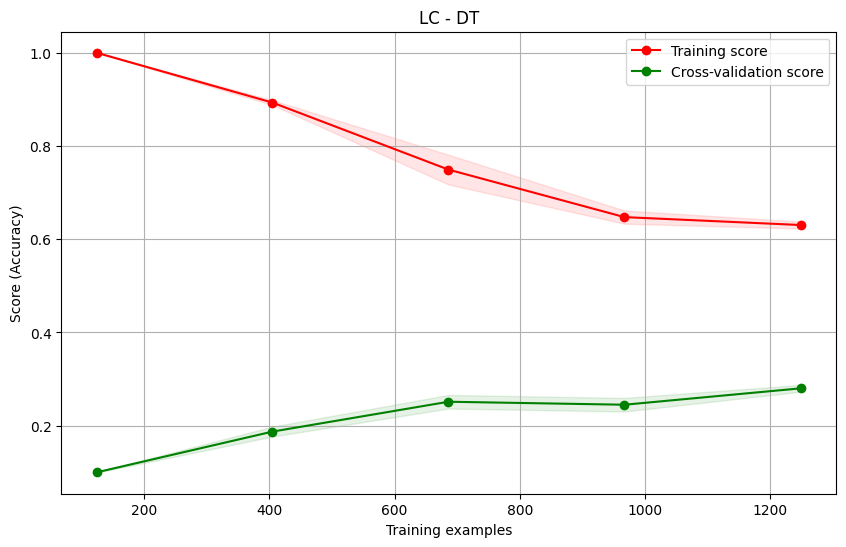

  ROC AUC (OvR, weighted): 0.6800


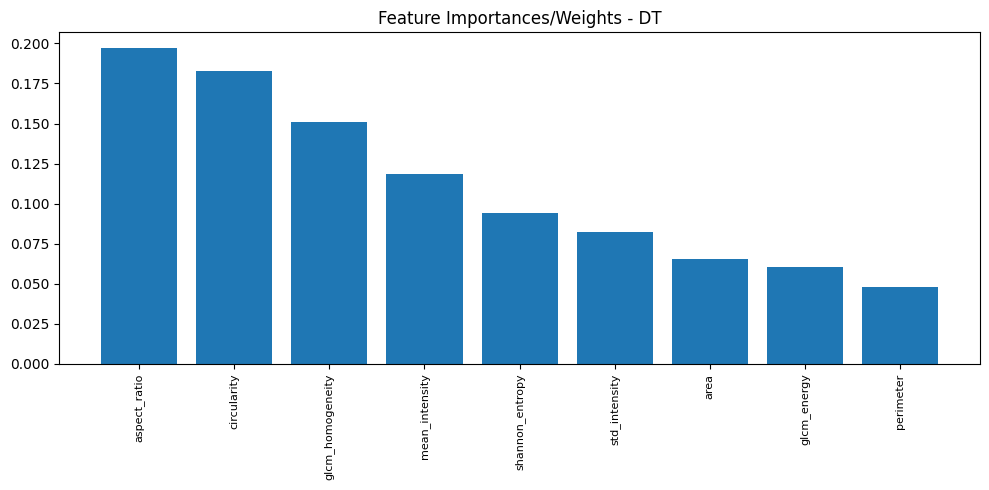



--- Comparative Model Performance Summary ---
        name  accuracy  precision_w  recall_w      f1_w  roc_auc_ovr_w  \
2         RF  0.397895     0.415053  0.397895  0.397335       0.788247   
0        SVM  0.381053     0.409383  0.381053  0.381713       0.775918   
1  k-NN(k=5)  0.347368     0.353607  0.347368  0.337081       0.685033   
5         DT  0.309474     0.335623  0.309474  0.311639       0.680037   
3     LogReg  0.282105     0.288607  0.282105  0.277214       0.720887   
4        GNB  0.267368     0.287168  0.267368  0.226420       0.701514   

   train_time_s  pred_time_s   status  
2      0.481954     0.014968  Success  
0      1.075500     0.054408  Success  
1      0.003216     0.042122  Success  
5      0.024881     0.000462  Success  
3      0.142704     0.000468  Success  
4      0.005023     0.001271  Success  


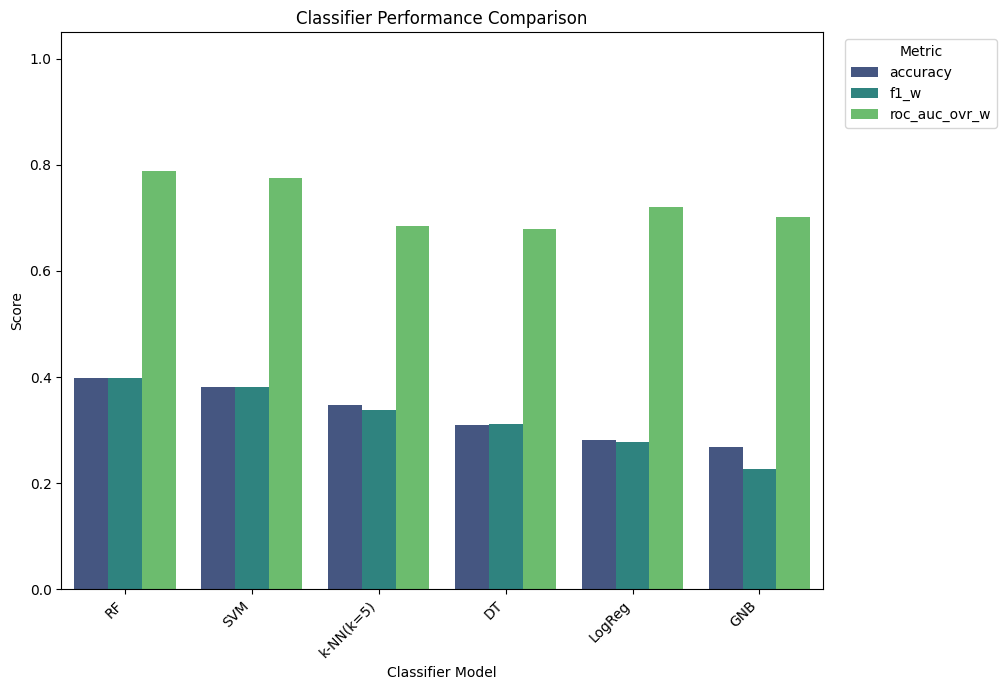


--- Machine Learning Classification Script Finished ---


In [34]:
def load_and_prep_classification_data(train_csv_p, test_csv_p, all_known_classes_list):
    try:
        train_df = pd.read_csv(train_csv_p)
        test_df = pd.read_csv(test_csv_p)
    except FileNotFoundError:
        print(f"CRITICAL ERROR: Feature CSV files not found. Train: '{train_csv_p}', Test: '{test_csv_p}'")
        return None, None, None, None, None, None

    print(f"Raw train features: {train_df.shape}, Raw test features: {test_df.shape}")

    feature_cols_for_ml = ['area', 'perimeter', 'aspect_ratio', 'circularity',
                           'mean_intensity', 'std_intensity', 'glcm_energy',
                           'glcm_homogeneity', 'shannon_entropy']
    target_col = 'class_label'

    train_df.dropna(subset=[target_col] + feature_cols_for_ml, inplace=True)
    test_df.dropna(subset=[target_col] + feature_cols_for_ml, inplace=True)
    print(f"Cleaned train features (after dropna on target & features): {train_df.shape}, Cleaned test features: {test_df.shape}")

    if train_df.empty:
        print("CRITICAL ERROR: Training DataFrame is empty after initial cleaning. Cannot proceed.")
        return None, None, None, None, None, None
    if test_df.empty:
        print("WARNING: Test DataFrame is empty after initial cleaning. Evaluation might be limited or fail.")

    X_train_raw = train_df[feature_cols_for_ml].values

    label_encoder = LabelEncoder()
    label_encoder.fit(all_known_classes_list)

    try:
        y_train_encoded = label_encoder.transform(train_df[target_col])
    except ValueError as e:
        print(f"CRITICAL Label encoding error for training data: {e}.")
        print("This means 'class_label' in your training CSV contains values not in `all_known_classes_list`.")
        print("Unique labels in train_df['class_label']:", train_df[target_col].unique())
        print("`all_known_classes_list` used for encoder:", all_known_classes_list)
        raise

    if not test_df.empty:
        X_test_raw = test_df[feature_cols_for_ml].values
        try:
            y_test_encoded = label_encoder.transform(test_df[target_col])
        except ValueError as e:
            print(f"WARNING: Label encoding error for test data: {e}. Some test labels might be unknown.")
            known_labels_mask_test = test_df[target_col].isin(all_known_classes_list)
            if not known_labels_mask_test.any():
                print("WARNING: No known labels in test set after filtering. Test set will be empty.")
                X_test_raw = np.empty((0, X_train_raw.shape[1]))
                y_test_encoded = np.empty((0,), dtype=int)
            else:
                test_df_filtered = test_df[known_labels_mask_test]
                X_test_raw = test_df_filtered[feature_cols_for_ml].values
                y_test_encoded = label_encoder.transform(test_df_filtered[target_col])
    else:
        X_test_raw = np.empty((0, X_train_raw.shape[1]))
        y_test_encoded = np.empty((0,), dtype=int)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_raw)

    if X_test_raw.shape[0] > 0:
        X_test_scaled = scaler.transform(X_test_raw)
    else:
        X_test_scaled = np.empty((0, X_train_scaled.shape[1]))


    X_train_scaled = np.nan_to_num(X_train_scaled, nan=0.0, posinf=0.0, neginf=0.0)
    X_test_scaled = np.nan_to_num(X_test_scaled, nan=0.0, posinf=0.0, neginf=0.0)

    print(f"Final X_train_scaled: {X_train_scaled.shape}, y_train_encoded: {y_train_encoded.shape}")
    print(f"Final X_test_scaled: {X_test_scaled.shape}, y_test_encoded: {y_test_encoded.shape}")

    return X_train_scaled, y_train_encoded, X_test_scaled, y_test_encoded, feature_cols_for_ml, label_encoder


# --- Plot Learning Curve Function ---
def plot_learning_curve_for_clf(estimator, title, X, y, cv_val=3, n_jobs_val=None, train_sizes_val=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10,6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score (Accuracy)")


    num_unique_classes_in_y = len(np.unique(y))
    if num_unique_classes_in_y < 2:
        print(f"Skipping learning curve for '{title}': Data contains only {num_unique_classes_in_y} class(es). Needs at least 2.")
        plt.text(0.5, 0.5, f"Cannot plot Learning Curve:\nData has only {num_unique_classes_in_y} class(es).",
                 horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
        return plt


    min_samples_per_class_lc = np.min(np.bincount(y)) if num_unique_classes_in_y > 1 else len(y)
    actual_cv_lc = min(cv_val, min_samples_per_class_lc)
    if actual_cv_lc < 2:
        print(f"Skipping learning curve for '{title}': Not enough samples in the smallest class for cv={cv_val} (min_samples_per_class={min_samples_per_class_lc}). Needs at least 2 for CV split.")
        plt.text(0.5, 0.5, f"Cannot plot Learning Curve:\nNot enough samples for CV (cv={actual_cv_lc}).",
                 horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
        return plt

    try:
        train_sizes, train_scores, test_scores = learning_curve(
            estimator, X, y, cv=actual_cv_lc, n_jobs=n_jobs_val, train_sizes=train_sizes_val, scoring='accuracy', error_score='raise')

        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        plt.grid()
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1, color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
        plt.legend(loc="best")
    except ValueError as e:
        print(f"Error plotting learning curve for {title}: {e}")
        plt.text(0.5, 0.5, f"Error plotting Learning Curve:\n{e}",
                 horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    return plt

# --- Evaluate Classifier Function ---
def evaluate_ml_classifier(clf_model, X_train_data, y_train_data, X_test_data, y_test_data, clf_name_str, le_object):
    print(f"\n--- Evaluating: {clf_name_str} ---")


    num_classes_in_train = len(np.unique(y_train_data))
    if num_classes_in_train < 2:
        print(f"Cannot train/evaluate {clf_name_str}: Training data has only {num_classes_in_train} class(es). Requires at least 2.")
        return {'name': clf_name_str, 'accuracy': 0, 'precision_w': 0, 'recall_w': 0, 'f1_w': 0,
                'roc_auc_ovr_w': None, 'train_time_s':0, 'pred_time_s':0, 'status': 'Error - single class in train'}

    start_train_time = time.time(); clf_model.fit(X_train_data, y_train_data); end_train_time = time.time()


    if X_test_data.shape[0] == 0 or y_test_data.shape[0] == 0:
        print(f"No test data available for {clf_name_str}. Skipping prediction and metrics.")
        acc, prec, rec, f1, roc_auc_ovr_weighted = 0,0,0,0, None
        y_pred_labels = np.array([])
    else:
        start_pred_time = time.time(); y_pred_labels = clf_model.predict(X_test_data); end_pred_time = time.time()
        acc = accuracy_score(y_test_data, y_pred_labels)
        prec = precision_score(y_test_data, y_pred_labels, average='weighted', zero_division=0)
        rec = recall_score(y_test_data, y_pred_labels, average='weighted', zero_division=0)
        f1 = f1_score(y_test_data, y_pred_labels, average='weighted', zero_division=0)
        print(f"  Accuracy: {acc:.4f}, Precision(w): {prec:.4f}, Recall(w): {rec:.4f}, F1-score(w): {f1:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test_data, y_pred_labels, target_names=le_object.classes_, zero_division=0, labels=np.arange(len(le_object.classes_))))



    if y_test_data.shape[0] > 0:
        cm = confusion_matrix(y_test_data, y_pred_labels, labels=np.arange(len(le_object.classes_)))
        plt.figure(figsize=(max(8, len(le_object.classes_)*0.7), max(6, len(le_object.classes_)*0.6)))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=le_object.classes_, yticklabels=le_object.classes_)
        plt.title(f'CM - {clf_name_str}'); plt.ylabel('True'); plt.xlabel('Predicted');
        plt.xticks(rotation=45, ha='right'); plt.yticks(rotation=0); plt.tight_layout()
        plt.savefig(f"cm_{clf_name_str.replace(' ', '_').lower().replace('(','').replace(')','').replace('=','_')}.png"); plt.show()


    lc_plot = plot_learning_curve_for_clf(clf_model, f"LC - {clf_name_str}", X_train_data, y_train_data)
    lc_plot.savefig(f"lc_{clf_name_str.replace(' ', '_').lower().replace('(','').replace(')','').replace('=','_')}.png"); plt.show()


    roc_auc_ovr_weighted = None
    if hasattr(clf_model, "predict_proba") and y_test_data.shape[0] > 0 and len(np.unique(y_test_data)) >= 2:
        try:
            y_proba_scores = clf_model.predict_proba(X_test_data)

            if y_proba_scores.shape[1] == len(le_object.classes_):
                 roc_auc_ovr_weighted = roc_auc_score(y_test_data, y_proba_scores, multi_class='ovr', average='weighted', labels=np.arange(len(le_object.classes_)))
                 print(f"  ROC AUC (OvR, weighted): {roc_auc_ovr_weighted:.4f}")
            else:
                print(f"  Skipping ROC AUC for {clf_name_str}: Model predicted for {y_proba_scores.shape[1]} classes, but LabelEncoder has {len(le_object.classes_)}.")
        except ValueError as e_roc:
            print(f"  Could not calculate ROC AUC for {clf_name_str}: {e_roc}")
            roc_auc_ovr_weighted = None

    return {'name': clf_name_str, 'accuracy': acc, 'precision_w': prec, 'recall_w': rec, 'f1_w': f1,
            'roc_auc_ovr_w': roc_auc_ovr_weighted,
            'train_time_s': end_train_time - start_train_time,
            'pred_time_s': end_pred_time - start_pred_time if y_test_data.shape[0] > 0 else 0,
            'status': 'Success'}


# --- Feature Importance Plot Function ---
def plot_clf_feature_importance(clf, feature_names_list, clf_name_str):
    importances = None
    if hasattr(clf, 'feature_importances_'):
        importances = clf.feature_importances_
    elif hasattr(clf, 'coef_'):
        if clf.coef_.ndim > 1:
            importances = np.mean(np.abs(clf.coef_), axis=0)
        else:
            importances = np.abs(clf.coef_)

    if importances is None:
        return

    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(max(10, len(feature_names_list)*0.7), 5))
    plt.title(f"Feature Importances/Weights - {clf_name_str}")
    plt.bar(range(len(feature_names_list)), importances[indices], align="center")
    plt.xticks(range(len(feature_names_list)), [feature_names_list[i] for i in indices], rotation=90, fontsize=8)
    plt.tight_layout()
    plt.savefig(f"fi_{clf_name_str.replace(' ', '_').lower().replace('(','').replace(')','').replace('=','_')}.png"); plt.show()


# --- Main Classification Script ---
print("\n\n--- Starting Machine Learning Classification (Revised) ---")

if 'INSTRUMENT_CLASSES' not in globals() or not INSTRUMENT_CLASSES:
    print("CRITICAL ERROR: INSTRUMENT_CLASSES is not defined. Please run Cell 1 first or define it.")

    raise NameError("INSTRUMENT_CLASSES not defined.")


X_train, y_train, X_test, y_test, feature_names_ml, le = load_and_prep_classification_data(
    TRAIN_FEATURES_CSV_PATH, TEST_FEATURES_CSV_PATH, INSTRUMENT_CLASSES
)

if X_train is None or y_train is None:
    print("CRITICAL ERROR: Training data loading/preparation failed for ML. Cannot proceed.")
else:
    print(f"\nData ready for ML. Number of classes in LabelEncoder: {len(le.classes_)}")
    print(f"Classes known by LabelEncoder: {le.classes_}")


    unique_train_classes_final, train_counts_final = np.unique(y_train, return_counts=True)
    print("\nFinal distribution of classes in y_train (input to models):")
    if len(unique_train_classes_final) > 0:
        for cls_idx, count in zip(unique_train_classes_final, train_counts_final):
            if 0 <= cls_idx < len(le.classes_):
                 print(f"  Class '{le.classes_[cls_idx]}' (encoded {cls_idx}): {count} samples")
            else:
                 print(f"  Class encoded {cls_idx} (name unknown): {count} samples")
    else:
        print("  y_train is empty.")

    if len(unique_train_classes_final) < 2:
        print("\nWARNING: Training data (y_train) contains less than 2 classes. Most classifiers will fail or produce trivial results.")
        print("Skipping classifier training and evaluation loop due to insufficient classes in training data.")
    elif X_test is not None and y_test is not None and X_test.shape[0] > 0 and len(np.unique(y_test)) < 1 and len(unique_train_classes_final) >=2 :

        print("\nWARNING: Test data (y_test) is empty or contains less than 2 classes. Evaluation metrics might be limited or misleading.")
        pass

    if len(unique_train_classes_final) >= 2 :
        min_samples_for_knn_bincount = np.bincount(y_train)
        min_samples_per_class_knn = np.min(min_samples_for_knn_bincount[min_samples_for_knn_bincount > 0]) if len(min_samples_for_knn_bincount[min_samples_for_knn_bincount > 0]) > 0 else 1

        n_neighbors_knn = min(5, max(1, min_samples_per_class_knn -1 if min_samples_per_class_knn > 1 else 1 ))

        classifiers_to_test = [
            (SVC(kernel='rbf', C=1, probability=True, random_state=42, class_weight='balanced'), "SVM"),
            (KNeighborsClassifier(n_neighbors=n_neighbors_knn), f"k-NN(k={n_neighbors_knn})"),
            (RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced', max_depth=10, min_samples_leaf=2), "RF"),
            (LogisticRegression(max_iter=1000, solver='saga', C=0.5, random_state=42, class_weight='balanced', multi_class='ovr'), "LogReg"),
            (GaussianNB(), "GNB"),
            (DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=10, min_samples_leaf=2), "DT")
        ]

        all_model_results = []
        for model, model_name in classifiers_to_test:
            try:

                results_dict = evaluate_ml_classifier(model, X_train, y_train, X_test, y_test, model_name, le)
                all_model_results.append(results_dict)
                if results_dict.get('status') == 'Success':
                     plot_clf_feature_importance(model, feature_names_ml, model_name)
            except Exception as e_clf_loop:
                import traceback
                print(f"ERROR during evaluation loop for {model_name}: {e_clf_loop}\n{traceback.format_exc()}")
                all_model_results.append({'name': model_name, 'accuracy': 0, 'precision_w': 0, 'recall_w': 0, 'f1_w': 0,
                                          'roc_auc_ovr_w': None, 'train_time_s':0, 'pred_time_s':0, 'status': f'Error - {e_clf_loop}'})

        if all_model_results:
            results_summary_df = pd.DataFrame([res for res in all_model_results if res is not None])
            if not results_summary_df.empty:
                results_summary_df.sort_values(by='f1_w', ascending=False, inplace=True)
                print("\n\n--- Comparative Model Performance Summary ---")
                print(results_summary_df)

                metrics_to_plot = ['accuracy', 'f1_w', 'roc_auc_ovr_w']
                plot_df_data = []
                for _, row in results_summary_df.iterrows():
                    for metric in metrics_to_plot:
                        if pd.notna(row.get(metric)):
                             plot_df_data.append({'name': row['name'], 'Metric': metric, 'Score': row[metric]})

                if plot_df_data:
                    plot_df = pd.DataFrame(plot_df_data)
                    plt.figure(figsize=(12, 7))
                    sns.barplot(x='name', y='Score', hue='Metric', data=plot_df, palette='viridis')
                    plt.title('Classifier Performance Comparison')
                    plt.xlabel('Classifier Model')
                    plt.ylabel('Score')
                    plt.xticks(rotation=45, ha="right")
                    plt.legend(title='Metric', bbox_to_anchor=(1.02, 1), loc='upper left')
                    plt.ylim(0, 1.05)
                    plt.tight_layout(rect=[0,0,0.85,1])
                    plt.savefig("ml_model_comparison_instruments.png")
                    plt.show()
                else:
                    print("No valid data to plot for model comparison (all scores might be NaN or metrics missing).")
            else:
                print("No valid model results to summarize after filtering.")
        else:
            print("No model results were collected.")

print("\n--- Machine Learning Classification Script Finished ---")

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import f_oneway
from matplotlib.patches import Ellipse

In [36]:
TRAIN_FEATURES_CSV_FOR_ANALYSIS = OUTPUT_TRAIN_FEATURES_CSV
ANALYSIS_PLOTS_OUTPUT_DIR = os.path.join(PROCESSED_DATASET_ROOT, 'feature_analysis_plots')
os.makedirs(ANALYSIS_PLOTS_OUTPUT_DIR, exist_ok=True)


In [37]:
def load_data_for_feature_analysis(csv_path):
    try: df = pd.read_csv(csv_path)
    except FileNotFoundError: print(f"ERROR: CSV for analysis not found: '{csv_path}'"); return None
    feature_cols_analysis = ['area', 'perimeter', 'aspect_ratio', 'circularity', 'mean_intensity', 'std_intensity', 'glcm_energy', 'glcm_homogeneity', 'shannon_entropy']
    df.dropna(subset=['class_label'] + feature_cols_analysis, inplace=True)
    for col in feature_cols_analysis: df[col] = pd.to_numeric(df[col], errors='coerce')
    df.dropna(subset=feature_cols_analysis, inplace=True)
    return df

In [38]:
def visualize_all_feature_distributions(df_analysis, features_list, class_order, output_path_base):
    print("\nVisualizing feature distributions by class...")
    n_cols_viz = 3; n_rows_viz = (len(features_list) + n_cols_viz - 1) // n_cols_viz
    fig, axes = plt.subplots(n_rows_viz, n_cols_viz, figsize=(5 * n_cols_viz, 4 * n_rows_viz)); axes = axes.flatten()
    for i, feat_name in enumerate(features_list):
        ax = axes[i]; sns.boxplot(x='class_label', y=feat_name, data=df_analysis, ax=ax, order=class_order, palette="Spectral", linewidth=0.8, fliersize=2)
        ax.tick_params(axis='x', rotation=60, ha='right', labelsize=8)
        valid_groups = [df_analysis[df_analysis['class_label'] == cls][feat_name].dropna() for cls in class_order if len(df_analysis[df_analysis['class_label'] == cls][feat_name].dropna()) >=2]
        title_str = feat_name
        if len(valid_groups) >= 2:
            try: f_stat, p_val = f_oneway(*valid_groups); title_str += f'\n(ANOVA p={p_val:.1e})'
            except ValueError: title_str += '\n(ANOVA err)'
        ax.set_title(title_str, fontsize=10)
    for j in range(i + 1, len(axes)): fig.delaxes(axes[j])
    plt.tight_layout(); plt.savefig(f"{output_path_base}_feature_distributions.png"); plt.show()

In [39]:
def generate_feature_correlation_matrix(df_analysis, features_list, output_path_base):
    print("\nGenerating overall feature correlation matrix...")
    plt.figure(figsize=(8, 6)); numeric_df = df_analysis[features_list]; corr_matrix = numeric_df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", annot_kws={"size": 7})
    plt.title('Overall Feature Correlation Matrix', fontsize=12); plt.xticks(rotation=45, ha='right', fontsize=8); plt.yticks(rotation=0, fontsize=8)
    plt.tight_layout(); plt.savefig(f"{output_path_base}_correlation_matrix_overall.png"); plt.show()

In [40]:
import matplotlib

def _confidence_ellipse_pca(x, y, ax, n_std=1.5, facecolor='none', **kwargs):
    if x.size!=y.size or x.size<2: return
    cov=np.cov(x,y);pearson=cov[0,1]/np.sqrt(cov[0,0]*cov[1,1]) if(cov[0,0]>0 and cov[1,1]>0) else 0
    pearson=np.clip(pearson,-1,1);ell_radius_x=np.sqrt(1+pearson);ell_radius_y=np.sqrt(1-pearson)
    ellipse=Ellipse((0,0),width=ell_radius_x*2,height=ell_radius_y*2,facecolor=facecolor,**kwargs)
    scale_x=np.sqrt(cov[0,0])*n_std;mean_x=np.mean(x);scale_y=np.sqrt(cov[1,1])*n_std;mean_y=np.mean(y)
    transf=matplotlib.transforms.Affine2D().rotate_deg(45).scale(scale_x,scale_y).translate(mean_x,mean_y)
    ellipse.set_transform(transf+ax.transData);return ax.add_patch(ellipse)

In [41]:
def perform_full_pca_analysis(df_analysis, features_list, target_label_col, class_names_ord, output_path_base):
    print("\nPerforming PCA analysis..."); X_pca_data = df_analysis[features_list].values; y_pca_labels_str = df_analysis[target_label_col]
    scaler_pca = StandardScaler(); X_pca_scaled = scaler_pca.fit_transform(X_pca_data); X_pca_scaled = np.nan_to_num(X_pca_scaled, nan=0.0)
    pca_model = PCA(n_components=2, random_state=42)
    try: X_pca_transformed = pca_model.fit_transform(X_pca_scaled)
    except: print("PCA fit error. Skipping."); return
    pca_results_df = pd.DataFrame(data=X_pca_transformed, columns=['PC1', 'PC2']); pca_results_df['class_label'] = y_pca_labels_str.values
    plt.figure(figsize=(12, 8)); palette_pca = sns.color_palette("husl", n_colors=len(class_names_ord))
    class_color_map_pca = {cls: palette_pca[i] for i, cls in enumerate(class_names_ord)}
    sns.scatterplot(data=pca_results_df,x='PC1',y='PC2',hue='class_label',hue_order=class_names_ord,palette=class_color_map_pca,alpha=0.6,s=40,edgecolor='k',linewidth=0.3)
    for cls_pca in class_names_ord:
        class_data_pca = pca_results_df[pca_results_df['class_label'] == cls_pca]
        if len(class_data_pca) > 2: _confidence_ellipse_pca(class_data_pca['PC1'], class_data_pca['PC2'], plt.gca(), facecolor=class_color_map_pca[cls_pca], alpha=0.1, edgecolor=class_color_map_pca[cls_pca], lw=0.8)
    plt.title(f'PCA (Top 2 PCs: {pca_model.explained_variance_ratio_.sum()*100:.1f}% Var.)', fontsize=12)
    plt.xlabel(f'PC1 ({pca_model.explained_variance_ratio_[0]*100:.1f}%)', fontsize=10); plt.ylabel(f'PC2 ({pca_model.explained_variance_ratio_[1]*100:.1f}%)', fontsize=10)
    plt.legend(title='Class', bbox_to_anchor=(1.02,1),loc='upper left',fontsize=8);plt.grid(True,linestyle=':',alpha=0.5);plt.tight_layout(rect=[0,0,0.88,1])
    plt.savefig(f"{output_path_base}_pca_scatter.png");plt.show()
    loadings_df = pd.DataFrame(pca_model.components_.T*np.sqrt(pca_model.explained_variance_),columns=['PC1','PC2'],index=features_list)
    plt.figure(figsize=(7,5));sns.heatmap(loadings_df,annot=True,cmap='vlag',center=0,fmt=".2f",annot_kws={"size":8})
    plt.title('PCA Loadings', fontsize=12); plt.xticks(fontsize=8); plt.yticks(fontsize=8); plt.tight_layout(); plt.savefig(f"{output_path_base}_pca_loadings.png");plt.show()

In [42]:
def visualize_all_feature_distributions(df_analysis, features_list, class_order, output_path_base):
    print("\nVisualizing feature distributions by class...")
    n_cols_viz = 3
    n_rows_viz = (len(features_list) + n_cols_viz - 1) // n_cols_viz
    fig, axes = plt.subplots(n_rows_viz, n_cols_viz, figsize=(5 * n_cols_viz, 4 * n_rows_viz))
    axes = axes.flatten()

    for i, feat_name in enumerate(features_list):
        ax = axes[i]
        sns.boxplot(x='class_label', y=feat_name, data=df_analysis, ax=ax, order=class_order, palette="Spectral", linewidth=0.8, fliersize=2)
        ax.tick_params(axis='x', rotation=60, labelsize=8)

        valid_groups = [df_analysis[df_analysis['class_label'] == cls][feat_name].dropna() for cls in class_order if len(df_analysis[df_analysis['class_label'] == cls][feat_name].dropna()) >=2]
        title_str = feat_name
        if len(valid_groups) >= 2:
            try:
                f_stat, p_val = f_oneway(*valid_groups)
                title_str += f'\n(ANOVA p={p_val:.1e})'
            except ValueError:
                title_str += '\n(ANOVA err)'
        ax.set_title(title_str, fontsize=10)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.savefig(f"{output_path_base}_feature_distributions.png")
    plt.show()



--- Starting Feature Analysis ---

Visualizing feature distributions by class...


<ipython-input-42-aa642a3cd5a8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class_label', y=feat_name, data=df_analysis, ax=ax, order=class_order, palette="Spectral", linewidth=0.8, fliersize=2)
<ipython-input-42-aa642a3cd5a8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class_label', y=feat_name, data=df_analysis, ax=ax, order=class_order, palette="Spectral", linewidth=0.8, fliersize=2)
<ipython-input-42-aa642a3cd5a8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class_label', y=feat_name, data=df_analysis, ax=ax, or

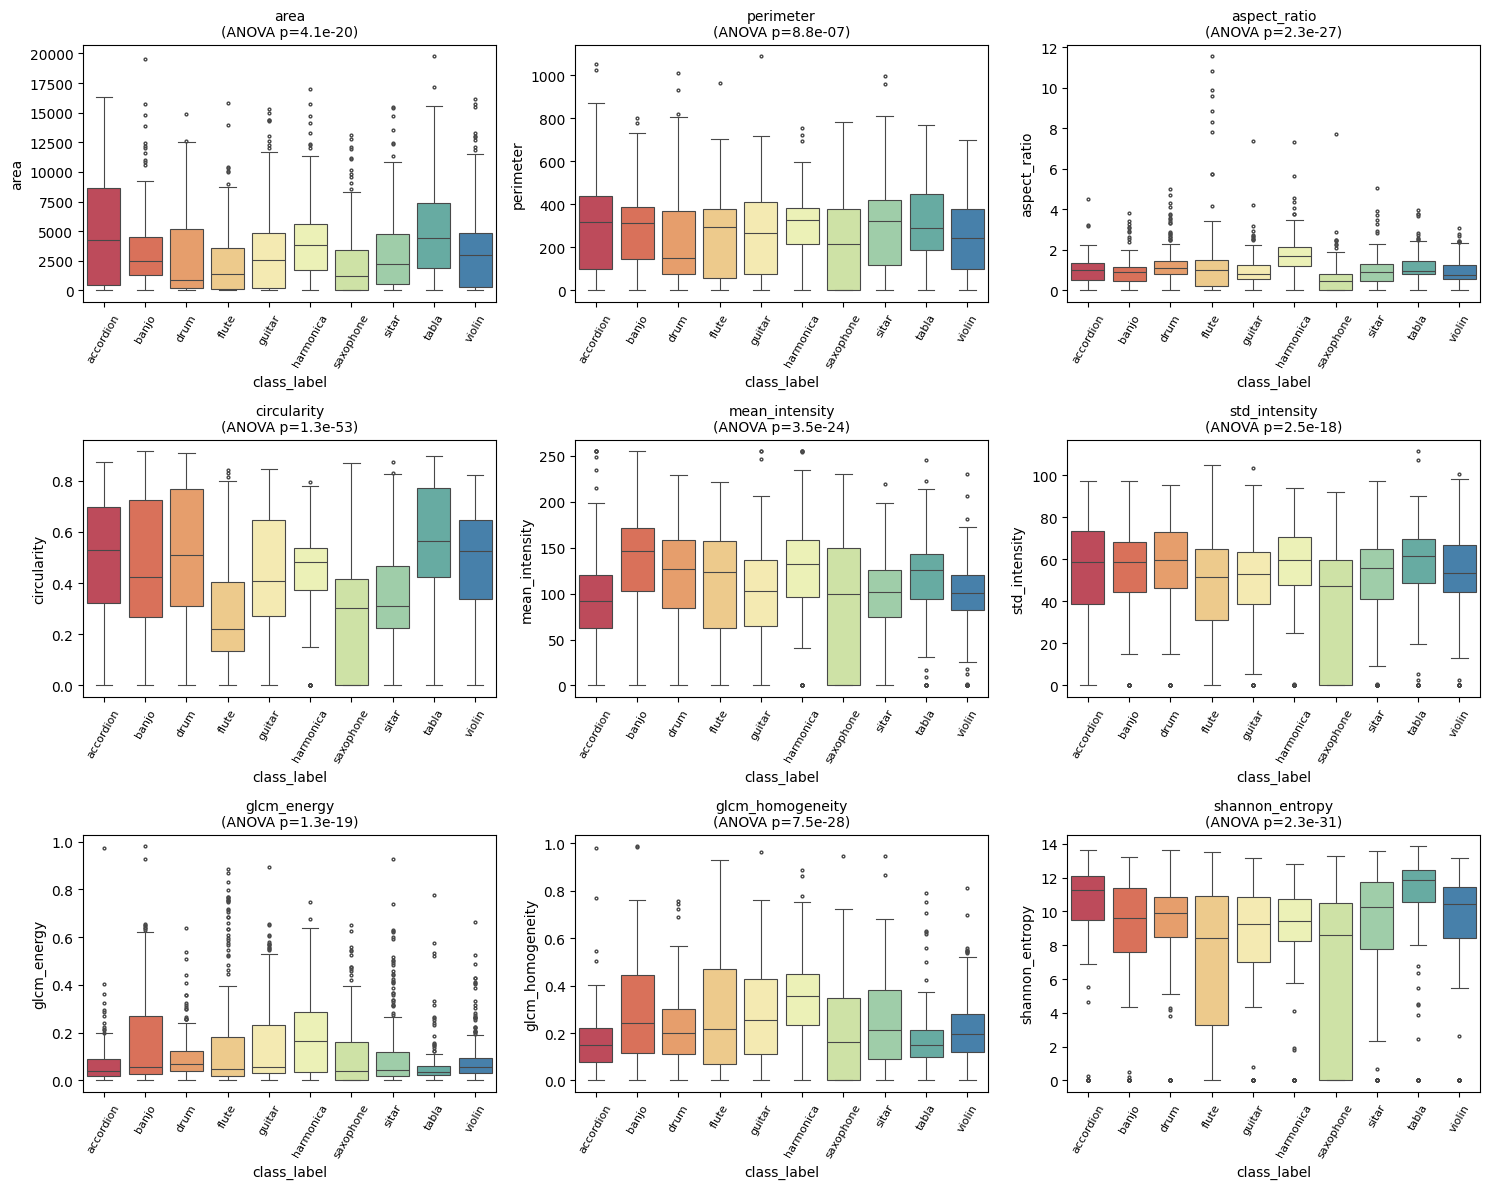


Generating overall feature correlation matrix...


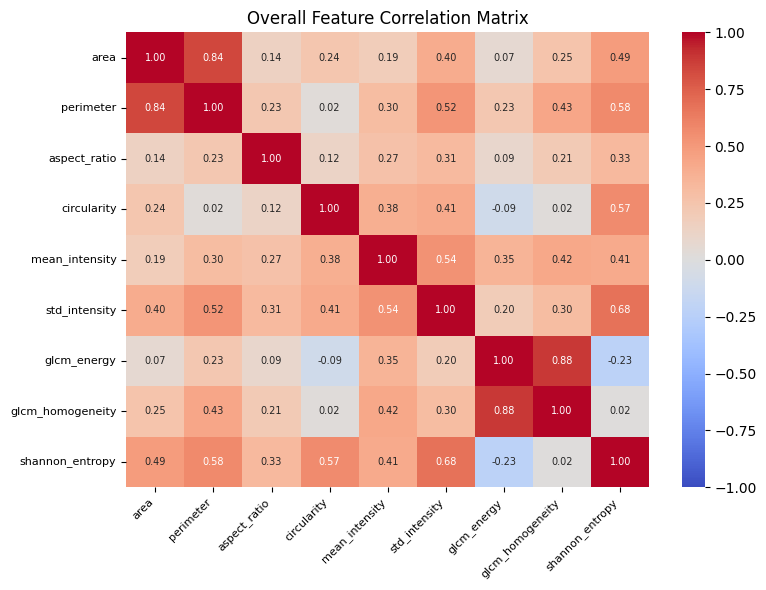


Performing PCA analysis...


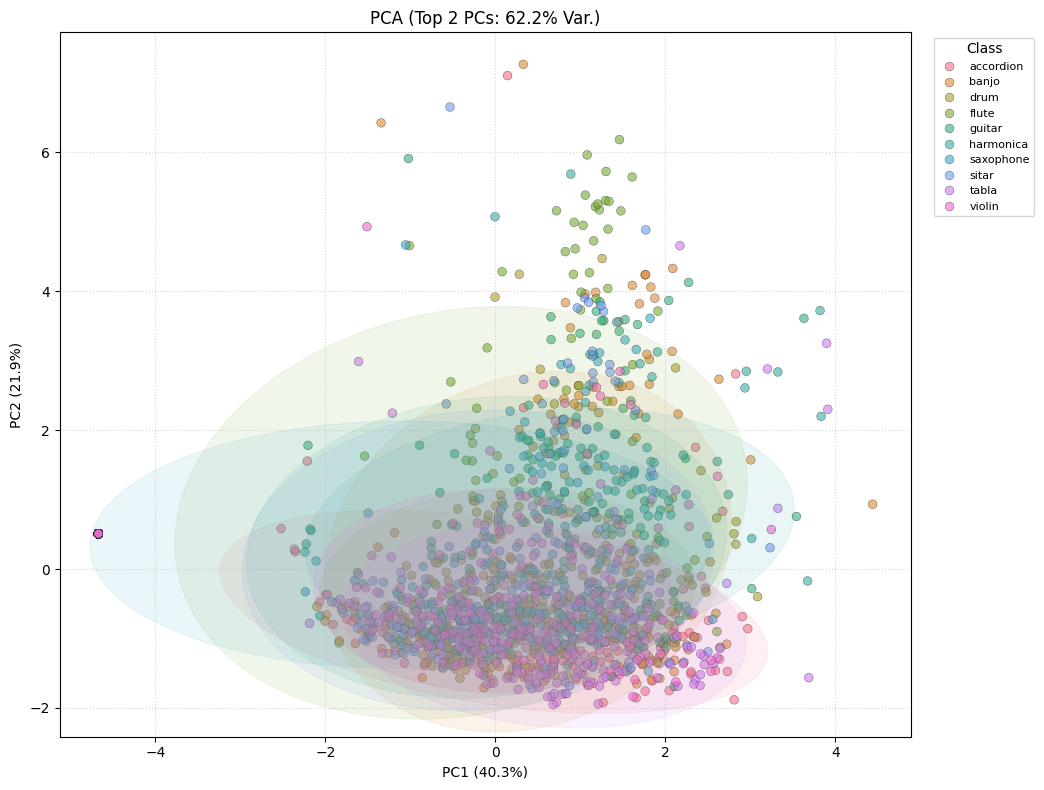

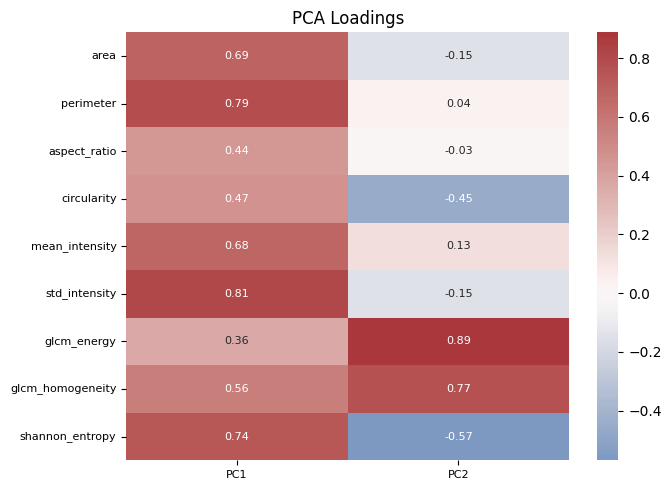


--- Feature Analysis Script Finished ---


In [43]:
print("\n\n--- Starting Feature Analysis ---")
df_train_for_analysis = load_data_for_feature_analysis(TRAIN_FEATURES_CSV_FOR_ANALYSIS)
if df_train_for_analysis is not None and not df_train_for_analysis.empty:
    features_to_analyze = ['area','perimeter','aspect_ratio','circularity','mean_intensity','std_intensity','glcm_energy','glcm_homogeneity','shannon_entropy']
    ordered_class_names_for_viz = INSTRUMENT_CLASSES
    visualize_all_feature_distributions(df_train_for_analysis, features_to_analyze, ordered_class_names_for_viz, os.path.join(ANALYSIS_PLOTS_OUTPUT_DIR, "analysis"))
    generate_feature_correlation_matrix(df_train_for_analysis, features_to_analyze, os.path.join(ANALYSIS_PLOTS_OUTPUT_DIR, "analysis"))
    perform_full_pca_analysis(df_train_for_analysis, features_to_analyze, 'class_label', ordered_class_names_for_viz, os.path.join(ANALYSIS_PLOTS_OUTPUT_DIR, "analysis"))
else: print("CRITICAL ERROR: No data for feature analysis.")
print("\n--- Feature Analysis Script Finished ---")